# Лабораторная работа №2

## Вариант 11
## Интерполяция. Сплайны

$\textbf{Цель}$: построение интерполяционного многочлена и кубического сплайна по заданной сетке

Во многих приложениях возникает необходимость по известному набору точек $\lbrace (x_i, y_i) \rbrace_{i=0}^{n}$ ($x_i \neq x_j$ при $i \neq j$) построить функцию $f(x)$, график которой проходит через все точки из набора. Процесс построения функии $f$ называется **интерполяцией**, а саму функцию $f$ - **интерполяционной функцией**. Чаще всего в качестве интерполяционной функции рассматривают многочлены. Тогда идёт речь о **полиномиальной интерполяции**. По набору из $n+1$ точки можно однозначно построить многочлен степени не выше $n$.

Перед рассмотрением методов полиномиальной интерполяции введём некоторые определения. **Сеткой** будем называть множество $\lbrace x_i \rbrace_{i=0}^{n}$ (как указано ранее, все $x_i$ различны). Элементы сетки называются **узлами сетки**. $\lbrace y_i \rbrace_{i=0}^{n}$ - набор значений на сетке. Набор точек $\lbrace (x_i, y_i) \rbrace_{i=0}^{n}$ определяет **сеточную функцию** $g(x)$. Иногда задачу интерполяции ставят следующим образом: построить функцию $f(x)$, которая совпадает с сеточной функцией $g(x)$ на множестве узлов сетки $\lbrace x_i \rbrace_{i=0}^{n}$.

1. **Интерполяционный многочлен Ньютона**

Интерполяционный многочлен Ньютона строится по следующей формуле

$$ P_n(x) = \sum\limits_{j = 0}^{n} b_j \prod\limits_{i = 0}^{j - 1} (x - x_i),$$

где $ b_j = f(x_0, x_1, ... , x_{j-1}, x_j)$.

Здесь использованы так называемые **разделённые разности** $f(x_0, x_1, ... , x_{j-1}, x_j)$, определяемые по реккурентной формуле

$$ f(x_i, x_{i+1}, ..., x_{i+j}) = \frac{f(x_{i+1}, x_{i+2}, ..., x_{i+j}) - f(x_i, x_{i+1}, ..., x_{i+j-1})}{x_{i+j} - x_{i}}.$$

$$ f(x_i, x_{i+1}, ..., x_{i+j}) = \sum\limits_{k = 0}^{j} \frac{f(x_{i+k})}{\prod\limits_{r = 0, \: r \neq i + j}^{j}  (x_{i + k} - x_{i+r})}.$$

2. **Интерполяционный многочлен Лагранжа**

Интерполяционный многочлен Лагранжа строится следующим образом

$$ P_n(x) = \sum\limits_{j = 0}^{n} f_j \prod\limits_{i = 0, \: i \neq j}^{j} \frac{(x - x_i)}{(x_j - x_i)}.$$


Помимо построения полинома, который будет интерполировать заданное множество точек на всём отрезке $[x_0, x_n]$, можно воспользоваться **кусочно-многочленной интерполяцией**. Её суть заключается в следующем: если мы хотим построить кусочно-непрерывную функцию, интерполирующую все заданные точки, то мы можем соединить соседние точки отрезками. Это означает, что на каждом отрезке $[x_i, x_{i+1}]$ задана линейная функция $S_i(x):$ 

$$S_i(x_i) = y_i, \: S_i(x_{i+1}) = y_{i+1}, \quad i = \overline{1, n-1}$$

Если мы хотим потребовать от функции $T(x)$, которая получается "сшивкой" $\lbrace S_i(x) \rbrace$ по всем отрезкам, принадлежности классу гладкости $C^1[x_0, x_{n}]$, то необходимо искать $S_i(x)$ в классе кубических многочленов. 

$$ S_i(x) = (a_0)_i x^3 + (a_1)_i x^2 + (a_2)_i x + (a_3)_i $$

Функцию $T(x)$ называют **кубическим сплайном**. Получим выражения для коэффициентов $a_{ij}$ кубического сплайна. Для этого нам необходимо знать представление для интерполяционного многочлена $P_n(x)$, а точнее представление для его производной $P_n'(x)$

$$ S_i'(x) = 3(a_0)_i x^2 + 2(a_1)_i x + (a_2)_i $$.

$$ S_i'(x_i) = P_n'(x_i), \:  S_{i+1}'(x_i) = P_n'(x_{i+1}), \quad i = \overline{1, n-1}$$

Имеем 4 уравнения в системе с 4 неизвестными коэффициентами. Разрешив систему, мы можем получить представление для $S_i(x)$, а значит и для всего кубического сплайна $T(x)$.

In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns

In [2]:
sns.set_theme()

Для раскрытия выражения в формуле 1 требуется функция, которая бы считала комбинации $$\prod\limits_{i = 0}^{j - 1} (x - x_i),$$

In [3]:
list(combinations(range(4),2))

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

Напишем функцию для подсчета следующего произведения

$$\prod\limits_{i = 0}^{j - 1} (x + x_i),$$

По заданному списку из $\lbrace x_i \rbrace_{i=0}^{n}$ функция выводит коэффициенты полученного многочлена после раскрытия всех скобок.

In [4]:
def vieta(data):
    k = len(data)
    coeff = [0 for i in range(len(data))]
    for i in range(k):
        input = list(combinations(data, i+1))
        result = [np.prod(tup) for tup in input]
        for j in range(len(result)):
            coeff[i] = coeff[i] + result[j]
    coeff.insert(0, 1)
    return coeff

Пример: пусть корни квадратного уравнения : -4 и 2, возьмем их с минусами

In [5]:
data = [4, -2]
coeff = vieta(data)
print(coeff)

[1, 2, -8]


(x + 4)(x - 2) = x$^{2}$ + 2x - 8. Работает верно

Заданные в варианте 11 массивы сетки и узлов:

In [6]:
x = [0.87267, 1.22173, 1.57080, 1.91986, 2.26893, 2.61799]
y = [0.00161, 0.01550, 0.09139, 0.39329, 1.35729, 3.97819]

1. **Интерполяционный многочлен Лагранжа**

Посчитаем коэффициенты многочлена

In [7]:
coeff = [-x[i] for i in range(len(x))]
poly_l = [0 for i in range(len(x))]
denominator = [0 for i in range(len(x) - 1)]

for j in range(len(x)):
    coeff.pop(j)
    den = 1
    for i in range(len(x) - 1):
        denominator[i] =  coeff[i] + x[j]
        den = denominator[i] * den
    for i in range(len(x)):
        poly_l[i] = poly_l[i] + vieta(coeff)[i] * y[j] / den
    coeff.insert(j, -x[j])

print(poly_l)

[0.4611174269925238, -2.8581147077007003, 7.4752542536951125, -9.951100809924384, 6.627402927773602, -1.7473516731800913]


Проверим лежат ли заданные точки на графике, заданном уравнением с посчитанными коэффициентами

Text(0, 0.5, 'y')

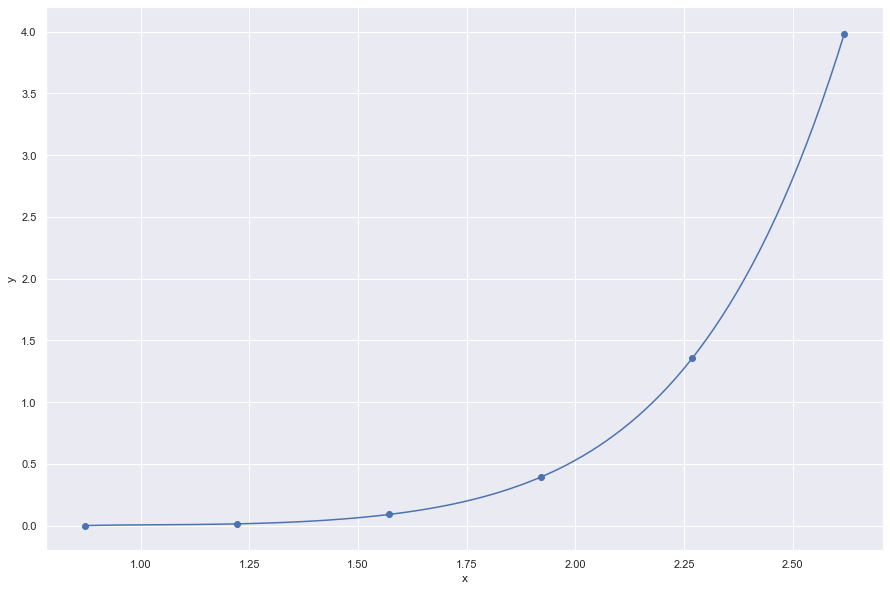

In [8]:
plt.rcParams["figure.figsize"] = (15,10)

plt.scatter(x , y)

x_ = np.linspace(0.87, 2.62, 100)
y_ = 0.4611174269925238 * x_**5 + (-2.8581147077007003) * x_**4 + 7.4752542536951125 * x_**3 + (-9.951100809924384) * x_**2 + 6.627402927773602 * x_ + (-1.7473516731800913)

plt.plot(x_, y_)

plt.xlabel('x')
plt.ylabel('y')


2. **Интерполяционный многочлен Ньютона**

In [9]:
def split(x, y, start, stop): #разделенные разности
    sum = 0
    for j in range(start, stop + 1):
        den = 1
        for r in range(start, stop + 1):
            if (r != j):
                den = den * (x[j] - x[r])
        sum = sum + y[j] / den
    return sum

In [10]:
coeff = [-x[i] for i in range(len(x))]
poly_n = [0 for i in range(len(x))]
denominator = [0 for i in range(len(x) - 1)]

for j in reversed(range(len(x))):
    coeff.pop(j)
    result = vieta(coeff)
    b = split(x, y, 0, j)
    for i in range(len(result)):
        result[i] = result[i] * b
    h = len(x) - len(result)
    for k in range(h):
        result.insert(0, 0)
    for i in range(len(poly_n)):
        poly_n[i] = poly_n[i] + result[i]

print(poly_n)

[0.4611174269925238, -2.8581147077007207, 7.475254253695168, -9.95110080992439, 6.627402927773617, -1.7473516731800744]


In [53]:
def pl(coeff, data):
    res = 0
    coeff.reverse()
    for i in range(len(coeff)):
        res+= coeff[i] * data **i
    return res

In [54]:
print(pl(poly_n, 2))

0.5310073127801722


Коэффициенты многочленов Ньютона и Лагранжа практически совпадают

3. **Кубический сплайн**

In [11]:
d_poly = [0 for i in range(len(poly_n) - 1)] #коэффиценты производной
for i in range(len(poly_n) - 1):
    d_poly[i] = poly_n[i] * (len(poly_n) - 1 - i)

In [12]:
a = [[0 for j in range(4)] for i in range(len(x) - 1)]

for i in range(len(a)):
    a[i][3] = ( np.polyval(d_poly, x[i+1]) * (x[i+1] - x[i]) - 2 * (y[i+1] - y[i]) +  np.polyval(d_poly, x[i]) * (x[i+1] - x[i])) / (x[i+1] - x[i])**3

    a[i][2] = ( -np.polyval(d_poly, x[i+1]) * (x[i+1] - x[i]) * (x[i+1] + 2 * x[i]) + 3 * (y[i+1] - y[i]) * (x[i+1] + x[i]) - np.polyval(d_poly, x[i]) * (x[i+1] - x[i]) * (x[i] + 2 * x[i + 1])) / (x[i+1] - x[i])**3

    a[i][1] = ( np.polyval(d_poly, x[i+1]) * x[i] * (2 * x[i+1] + x[i]) * (x[i+1] - x[i]) - 6 * (y[i+1] - y[i]) * x[i] * x[i+1] + np.polyval(d_poly, x[i]) * x[i+1] * (x[i+1] + 2 * x[i]) * (x[i+1] - x[i])) / (x[i+1] - x[i])**3

    a[i][0] = ( - np.polyval(d_poly, x[i+1]) * x[i]**2 * x[i+1] * (x[i+1] - x[i]) + y[i+1] * x[i]**2 * (3 * x[i+1] - x[i]) + y[i] * x[i+1]**2 * (x[i+1] - 3 * x[i]) - np.polyval(d_poly, x[i]) * x[i+1]**2 * x[i] * (x[i+1] - x[i])) / (x[i+1] - x[i])**3

In [13]:
for i in range(len(a)):
    print(a[i])
    print()

[-0.694089912470455, 1.9651481528125994, -1.851497183789233, 0.5880173840614255]

[-0.7060200545802033, 1.8985992133854908, -1.7185768554135161, 0.5303479078520804]

[-5.031333204532089, 10.036099338525243, -6.82061400120822, 1.5963849438635997]

[-20.815942835959024, 34.55071722722939, -19.511114725435025, 3.7861349304942027]

[-59.92271348075351, 86.0800881433277, -42.14355026744888, 7.099591429345727]



In [26]:
def sp(a, data):
    return a[0] + a[1] * data + a[2] * data**2 + a[3] * data**3
    

In [50]:
print(sp(a[3], 2))

0.5301121607132835


In [18]:
s = []

for i in range(len(a)):
    temp = a[i][0] + a[i][1] * x[i] + a[i][2] * x[i]**2 + a[i][3] * x[i]**3
    s.append(temp)

In [19]:
for i in range(len(s)):
    print(s[i])
    print()

0.0016099999999998338

0.01550000000000018

0.09138999999999697

0.393290000000043

1.357290000000006



Для проверки правильности построения кубического сплайна выпишем значения сплайна в узлах полинома.

In [14]:
for i in range(len(a)):
    u1 = a[i][3] * x[i]**3 + a[i][2] * x[i]**2 + a[i][1] * x[i] + a[i][0]
    u2 = a[i][3] * x[i+1]**3 + a[i][2] * x[i+1]**2 + a[i][1] * x[i+1] + a[i][0]
    print(i,':', "{:.6f}".format(u1), "{:.6f}".format(u2))

0 : 0.001610 0.015500
1 : 0.015500 0.091390
2 : 0.091390 0.393290
3 : 0.393290 1.357290
4 : 1.357290 3.978190


In [15]:
for i in range(len(a)):
    u1 = 3 * a[i][3] * x[i]**2 + 2 * a[i][2] * x[i] + a[i][1]
    u2 = 3 * a[i][3] * x[i+1]**2 + 2 * a[i][2] * x[i+1] + a[i][1]
    print(i,':', "{:.6f}".format(u1), "{:.6f}".format(u2))

0 : 0.077075 0.074156
1 : 0.074156 0.425280
2 : 0.425280 1.499017
3 : 1.499017 4.485570
4 : 4.485570 11.396367


Значения производной также совпадают на концах. Кубический сплайн построен верно.